# Projekt: Erkennung von Spurmarkierungen

In diesem Projekt sollen Spurmarkierungen in zwei bestehenden Datensätzen erkannt werden:

1. Udacity Nanodegree "Self-Driving Car Engineer" (https://www.udacity.com/course/self-driving-car-engineer-nanodegree--nd0013)
2. KITTI-Datensatz zur Erkennung von Spurmarkierungen (http://www.cvlibs.net/datasets/kitti/eval_road.php)


In [96]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import os

print('Willkommen beim Projekt "Erkennung von Spurmarkierungen"')

Willkommen beim Projekt "Erkennung von Spurmarkierungen"


# Exkurs 1: Kamerakalibrierung zur Entzerrung der Bilder

Die vorhandenen Bilder sind aufgrund der Linsen- und Kameraeigenschaften verzerrt. Entzerren Sie die Bilder mithilfe der Kamerakalibrierungsroutinen von OpenCV (https://docs.opencv.org/4.5.3/dc/dbb/tutorial_py_calibration.html) und den aufgezeichneten Bildern.


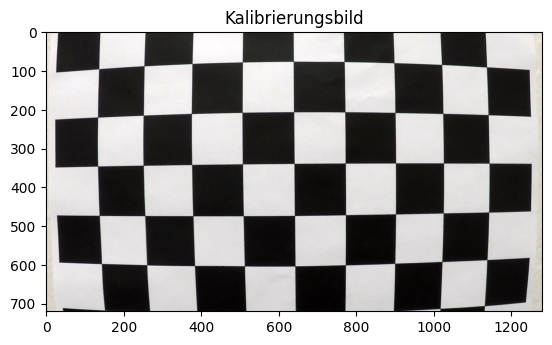

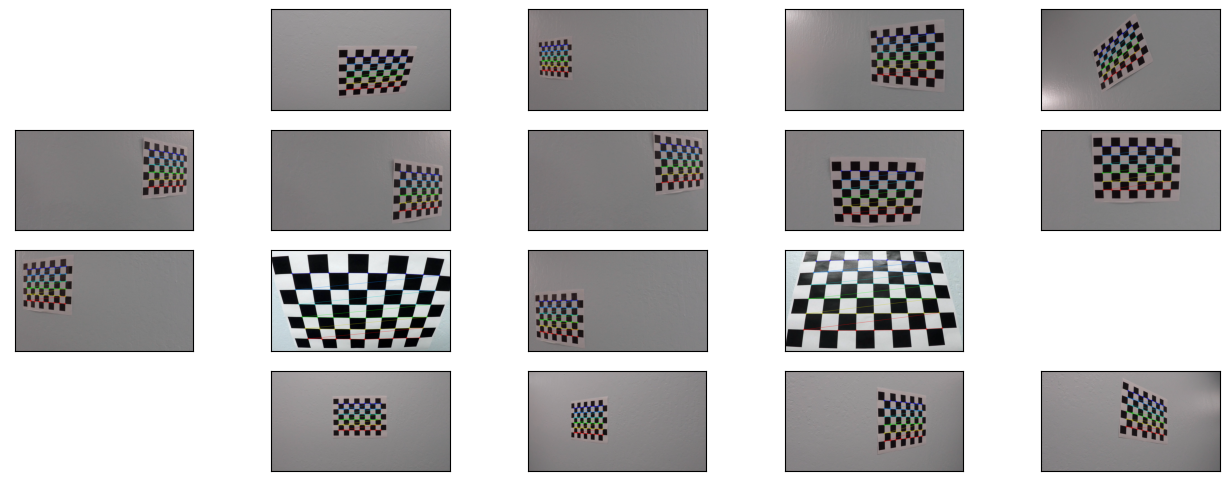

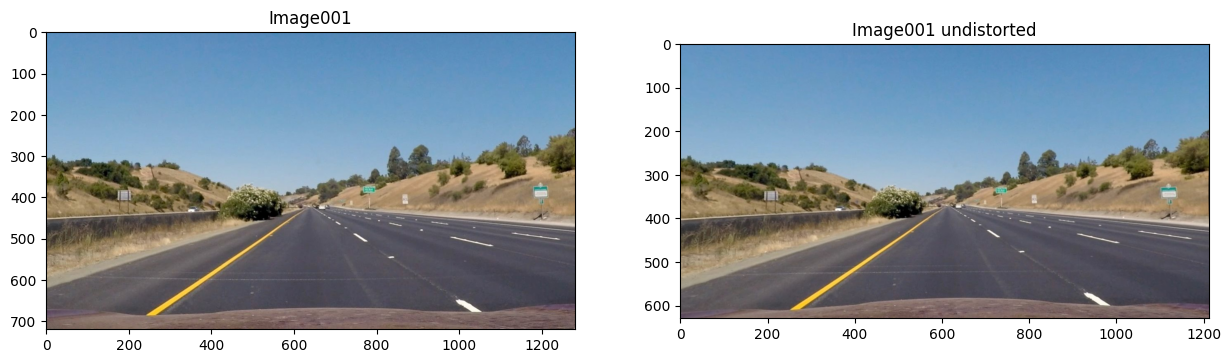

total error: 0.10841441717950569


In [97]:
import glob

# einlesen eines Beispielbildes
img1 = cv.cvtColor(cv.imread('./img/Udacity/calib/calibration1.jpg'), cv.COLOR_BGR2RGB)
plt.imshow(img1)
plt.title('Kalibrierungsbild')
plt.show()

# size of chessboard, minimum error with (7, 6), but there were severe artefacts at the borders (see error calculation at the end) 
x, y = 9, 6


# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((y*x,3), np.float32)
objp[:,:2] = np.mgrid[0:x,0:y].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.


images = glob.glob('./img/Udacity/calib/*.jpg')
# images = ['./img/Udacity/calib/calibration1.jpg']
plt.figure(figsize=(16,6))
for i, fname in enumerate(images):
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (x,y), None)
    # print(ret)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (x,y), corners2, ret)
        plt.subplot(4,5,i+1)
        plt.imshow(img)
        plt.xticks([]) 
        plt.yticks([])
plt.show()

ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

img = cv.imread('./img/Udacity/image001.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

def undistort_image(img):
    h,  w = img.shape[:2]
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

    # undistort
    img_undist = cv.undistort(img, mtx, dist, None, newcameramtx)
    # crop the image
    x, y, w, h = roi
    return img_undist[y:y+h, x:x+w]

img_undist = undistort_image(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Image001')

plt.subplot(1, 2, 2)
plt.imshow(img_undist, cmap='gray')
plt.title('Image001 undistorted')
plt.show()


# error calculation
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    mean_error += error
print( f"total error: {mean_error/len(objpoints)}")



Alternative

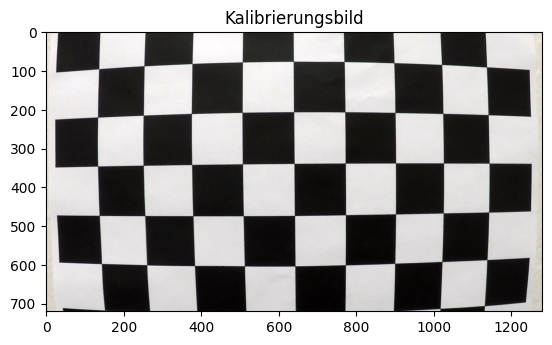

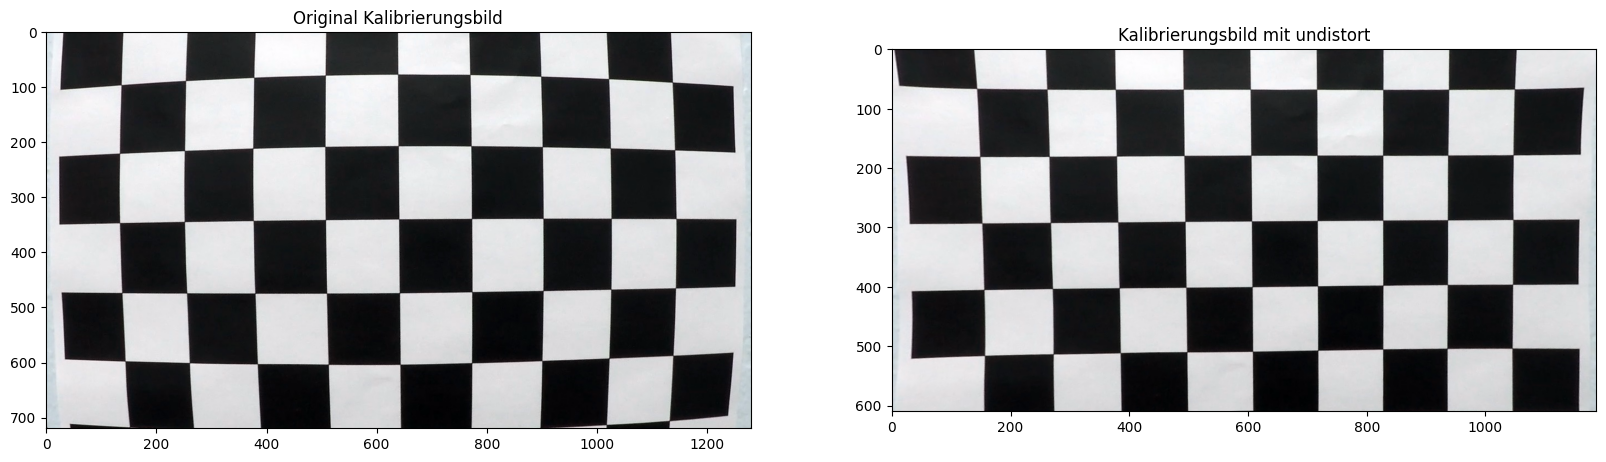

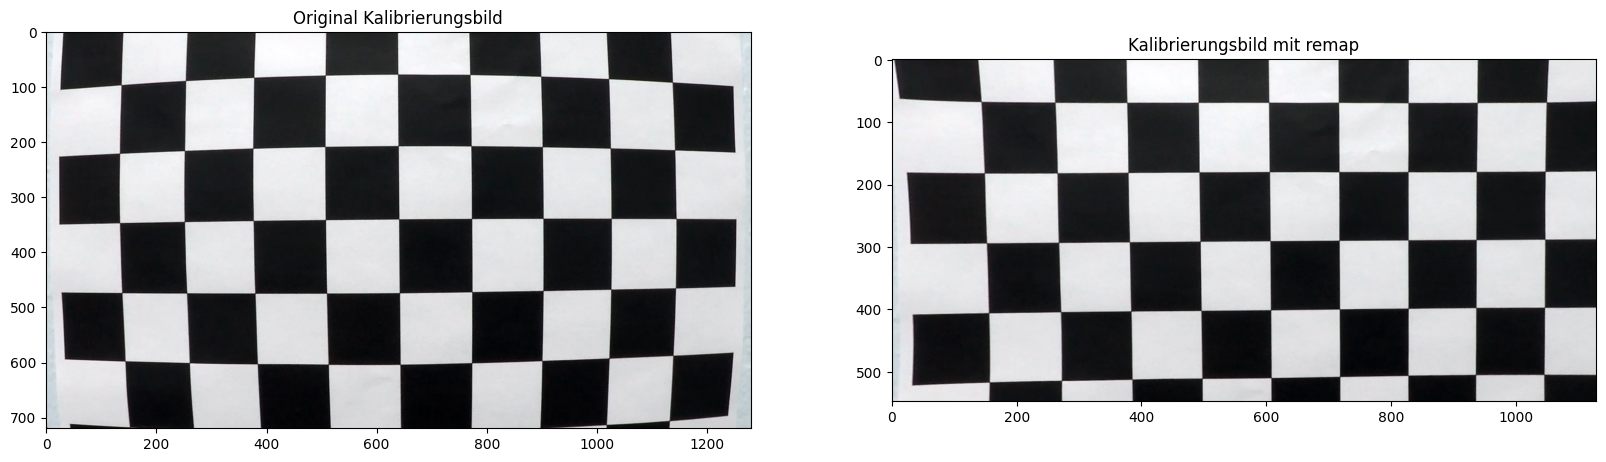

total error: 0.1109127387292572


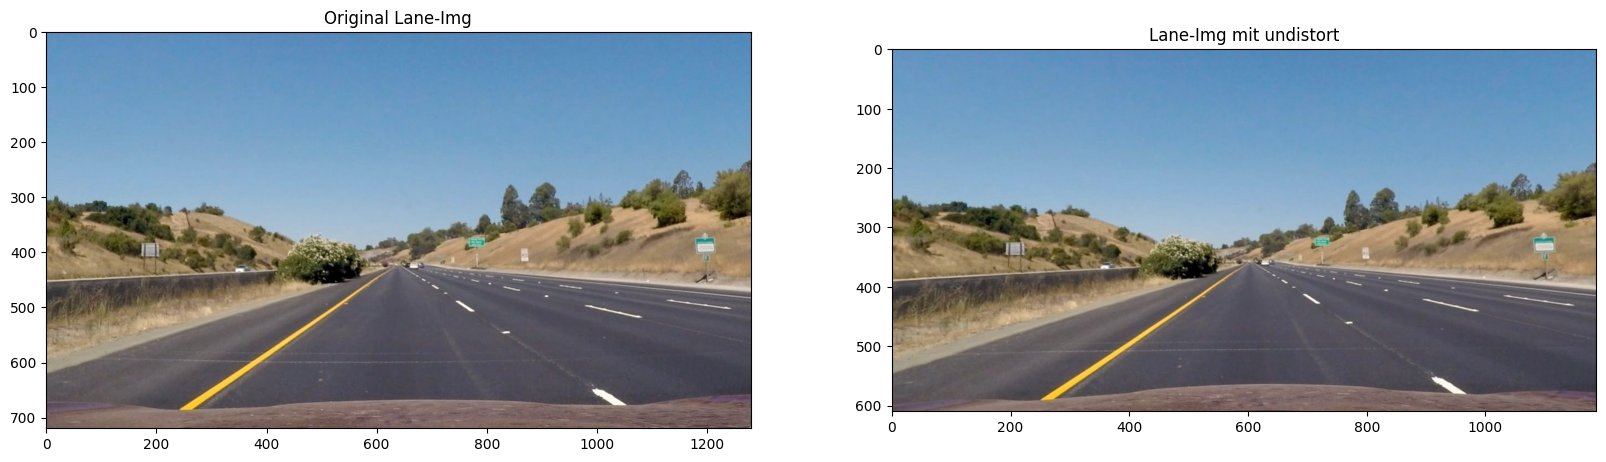

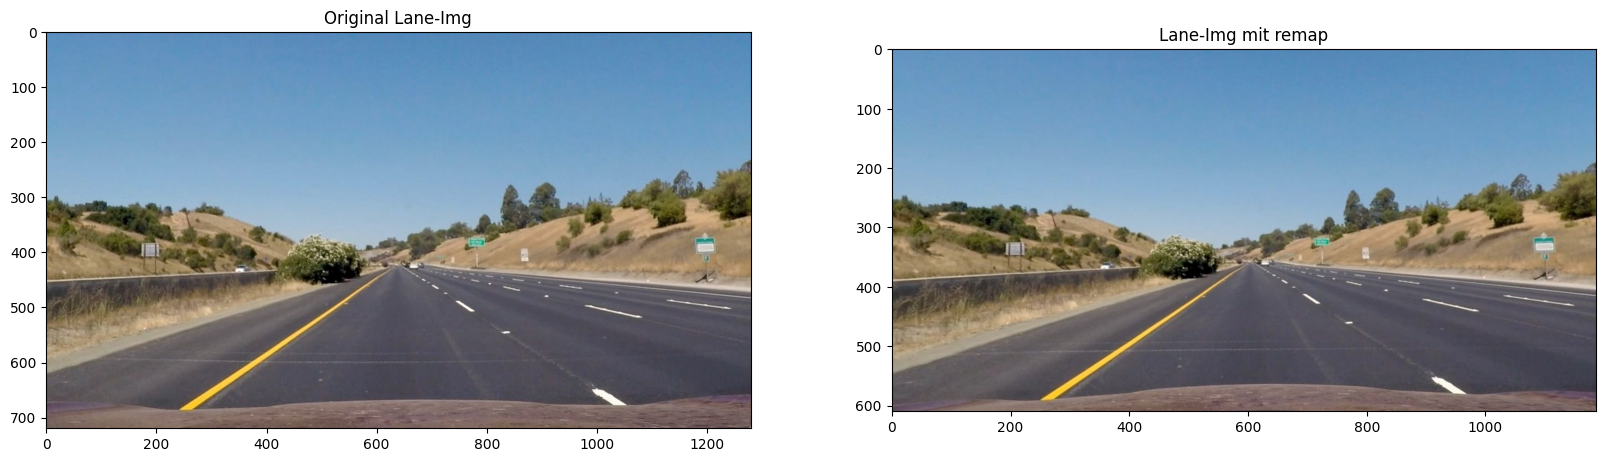

In [100]:
# einlesen eines Beispielbildes
img1 = cv.cvtColor(cv.imread('./img/Udacity/calib/calibration1.jpg'), cv.COLOR_BGR2RGB)
plt.imshow(img1)
plt.title('Kalibrierungsbild')
plt.show()

width = 9
height = 6

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((width*height,3), np.float32)
objp[:,:2] = np.mgrid[:width,:height].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('./img/Udacity/calib/*.jpg')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (width, height), None, cv.CALIB_CB_ADAPTIVE_THRESH)
    #ret, corners = cv.findChessboardCornersSB(gray, (6,5), None, cv.CALIB_CB_LARGER + cv.CALIB_CB_EXHAUSTIVE + cv.CALIB_CB_ACCURACY + cv.CALIB_CB_NORMALIZE_IMAGE)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        #Draw and display the corners
        cv.drawChessboardCorners(img, (width, height), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
cv.destroyAllWindows()

ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

img = cv.imread('./img/Udacity/calib/calibration1.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Kalibrierungsbild")
plt.subplot(1,2,2)
plt.imshow(dst)
plt.title("Kalibrierungsbild mit undistort")
plt.show()

# remap
mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Kalibrierungsbild")
plt.subplot(1,2,2)
plt.imshow(dst)
plt.title("Kalibrierungsbild mit remap")
plt.show()

mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)) )

#----------Fahrspur undistort----------

img = cv.imread('./img/Udacity/image001.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Lane-Img")
plt.subplot(1,2,2)
plt.imshow(dst)
plt.title("Lane-Img mit undistort")
plt.show()

#----------Fahrspur remap----------

img = cv.imread('./img/Udacity/image001.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Lane-Img")
plt.subplot(1,2,2)
plt.imshow(dst)
plt.title("Lane-Img mit remap")
plt.show()

# Exkurs 2: Perspektivtransformation

Durch die Kameraperspektive wird die Krümmung der gefundenen Spurmarkierungen nicht der realen Fahrstreifenkrümmung entsprechen. Transformieren Sie daher die Bilder der Kameraperspektive in eine Vogelperspektive, die der realen Fahrstreifenkrümmung entspricht.


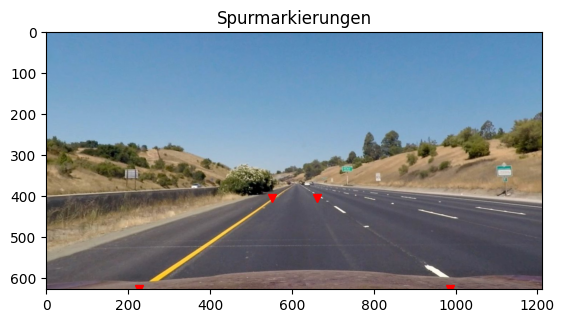

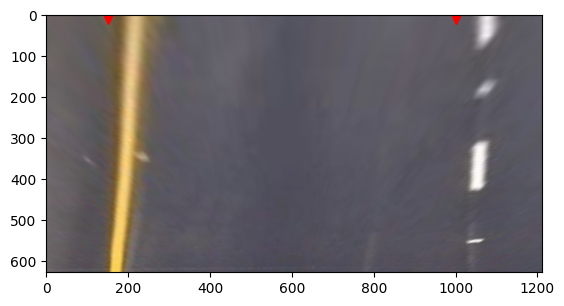

(628, 1212, 3)


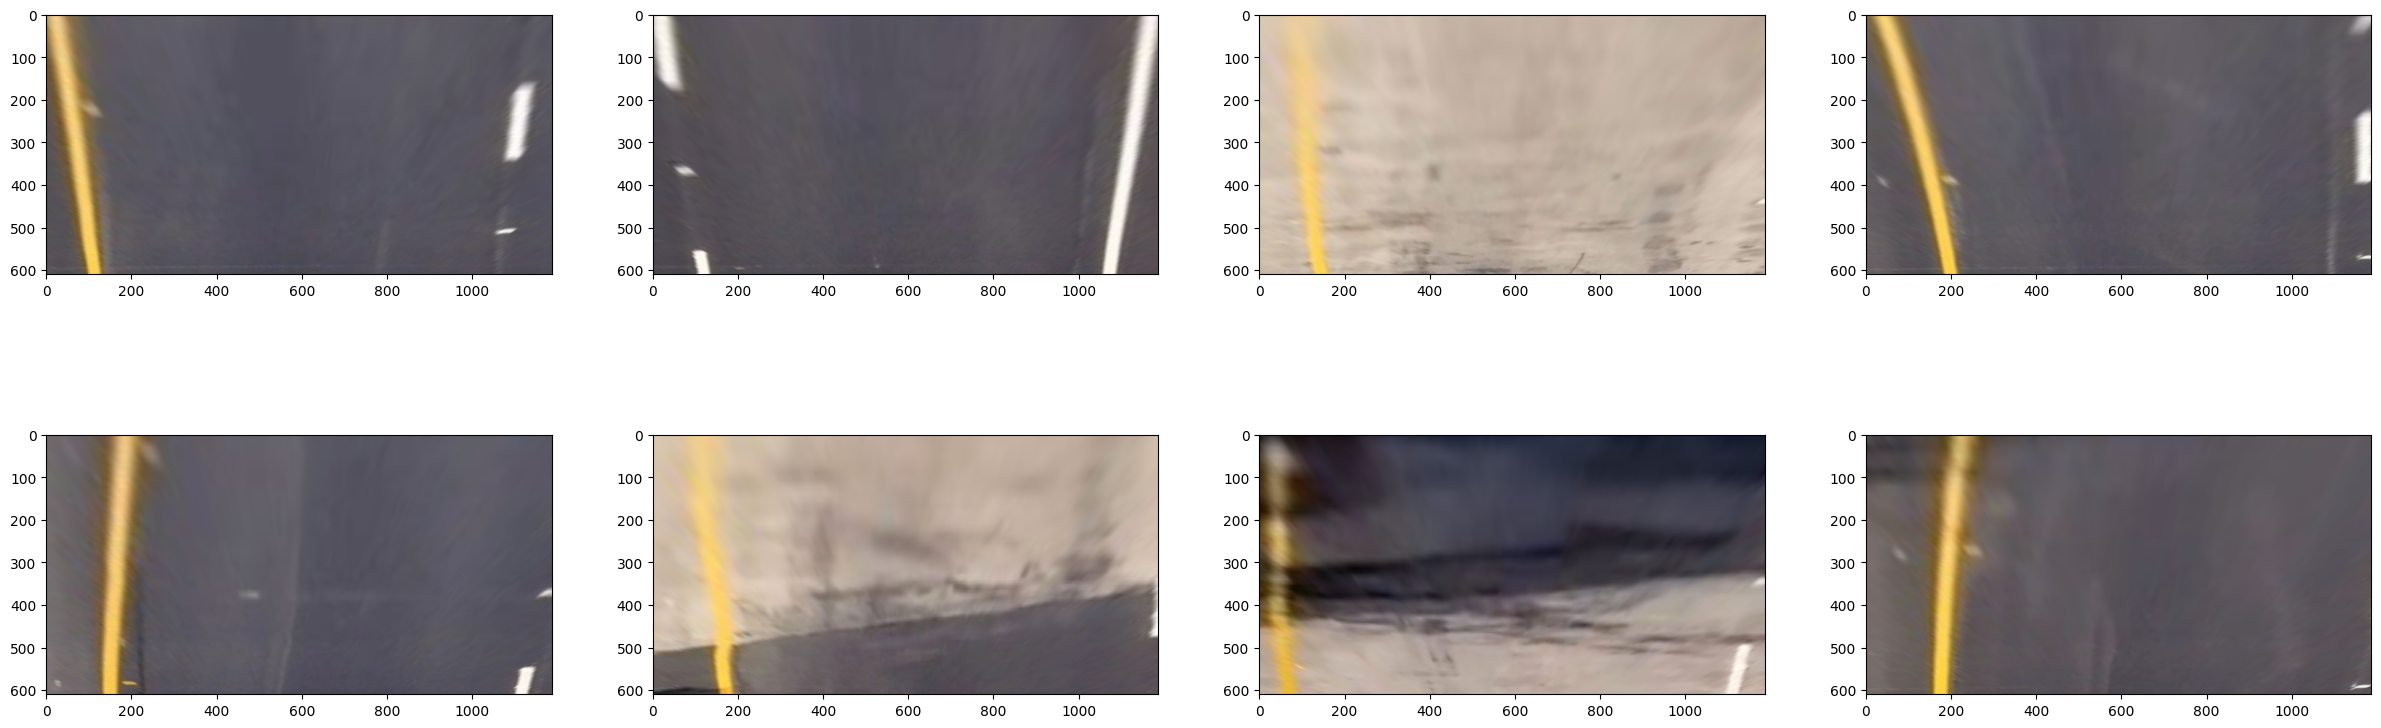

In [99]:
# einlesen eines Beispielbildes
img1 = cv.imread('img/Udacity/image001.jpg', -1)
img1 = img_undist
# definieren Sie die für eine Perspektivtransformation notwendigen Quell- und Zielpunkte
# pdf
# src = np.array([[598, 448], [684, 448], [1026, 668], [278, 668]], np.float32)
# dst = np.array([[300, 0], [980, 0], [980, 720], [300, 720]], np.float32)
# gute
# src = np.float32([[250, 600], [560, 400], [950, 600], [660, 400]])
# dst = np.float32([[200, 720], [200, 10], [1000, 720], [1000, 10]])
# besser
# x = int(img1.shape[1]/2)
# y = int(img1.shape[0]/2)
# src = np.float32([[x-380, y*2], [x-55, y+90], [x+380, y*2], [x+55, y+90]])
# dst = np.float32([[150, 720], [150, 10], [1000, 720], [1000, 10]])
# fixwerte aus oberen, trapez in src
src = np.float32([[226, 628], [551, 404], [986, 628], [661, 404]])
dst = np.float32([[150, 720], [150, 10], [1000, 720], [1000, 10]])


for point in src:
    plt.plot(point[0], point[1], marker='v', color="red")
plt.imshow(img1)
plt.title('Spurmarkierungen')
plt.show()

M = cv.getPerspectiveTransform(src,dst)
img1_warp = cv.warpPerspective(img1,M,(img1.shape[1], img1.shape[0]))
for point in dst:
    plt.plot(point[0], point[1], marker='v', color="red")
plt.imshow(img1_warp)
plt.show()

print(img1_warp.shape)

# alle Bilder warpen
images = glob.glob('./img/Udacity/*.jpg')
plt.figure(figsize=(30, 10))
for index, image in enumerate(images):
    img1 = undistort_image(cv.cvtColor(cv.imread(image, -1), cv.COLOR_BGR2RGB) )
    img1_warp = cv.warpPerspective(img1,M,(img1.shape[1], img1.shape[0]))
    plt.subplot(2, 4, index+1)
    plt.imshow(img1_warp)
plt.show()


# Aufgabe 3: Erkennung von Fahrbahnmarkierungen

Erkennen Sie die Fahrbahnmarkierungen bzw. Fahrstreifen auf den Bildquellen von Udacity. Wenden Sie dabei die aus der Vorlesung bekannten Verfahren an. Gerne dürfen Sie auch weitere Verfahren aus anderen Quellen verwenden. Folgende Ziele müssen bei der finalen Abgabe erreicht werden:

- **Segmentierung**: schränken Sie das Bild auf den Bereich ein, in dem sich die Spurmarkierungen befinden
- **Vorverarbeitung**: führen Sie eine Kamerakalibrierung (für Udacity-Bildquellen) und die Perspektivtransformation durch
- **Farbräume, Histogramme**: erkennen Sie die Spurmarkierungen in den Farben der angegebenen Quellen. Sofern weitere Spurmarkierungen auf dem Bild gefunden werden, müssen diejenigen Spurmarkierungen priorisiert werden, die die eigene Fahrspur begrenzen
- **Allgemeines**: Die Verarbeitung von Bildern muss in Echtzeit stattfinden --> Ziel: > 20 FPS
- **Allgemeines**: Beschleunigen Sie die Verarbeitung durch weitere Maßnahmen weitere Maßnahmen überlegen (bspw. Erkennung der Spurmarkierung in den ersten Frames, Tracking der Spurmarkierung in weiteren Frames solange, bis sich Spurmarkierungspositionen zu stark ändern)
- **Minimal**: relevante Spurmarkierungen werden im Video "project_video" durchgehend erkannt
- **Zusatz**: relevante Spurmarkierungen werden im Video "challenge_video" und "harder_challenge_video" durchgehend erkannt
- **Zusatz**: relevante Spurmarkierungen werden auf den Datensatz KITTI angewendet. Welche Anpassungen müssen vorgenommen werden, damit Ihr Algorithmus übertragen werden kann?
- **Zusatz**: Erarbeiten Sie weitere Maßnahmen zur Geschwindigkeitsverbesserung Ihres Algorithmus
- **Zusatz**: Erkennen Sie Objekte im Bild und visualisieren Sie diese (z.B. weitere Fahrzeuge, Motorräder, etc.)Die Objekterkennung bitte so implementieren, dass sie deaktivierbar ist und nicht in FPS-Berechnung einzahlt.


# Ausblick auf weitere Teilaufgaben

- Bestimmung der Kurvenkrümmung anhand von Polynom-Fiting
